Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [203]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [204]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [205]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [206]:
# YOUR CODE GOES HERE
transactions.head(4)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [207]:
#transactions = transactions.sample(n = 10000) 

In [208]:
transactions['date'] = pd.to_datetime(transactions['date'],format="%d.%m.%Y")
transactions['year'],transactions['month'],transactions['day'] = transactions['date'].dt.year,transactions['date'].dt.month,transactions['date'].dt.day
sept_14_transactions = transactions[transactions.year == 2014][transactions.month == 9]
selected_sept_14_transactions = sept_14_transactions[['shop_id','item_price' , 'item_cnt_day']]
selected_sept_14_transactions['revenue'] = selected_sept_14_transactions.item_price * selected_sept_14_transactions.item_cnt_day


max_revenue_temp = selected_sept_14_transactions[['shop_id','revenue']].groupby(['shop_id'])['revenue'].sum().max()


#selected_sept_14_transactions.head(10)

/Users/sourabhchaki/anaconda3/envs/AI4Fun/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sourabhchaki/anaconda3/envs/AI4Fun/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [209]:
# YOUR CODE GOES HERE

max_revenue = max_revenue_temp
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [210]:
summer_transactions = transactions[transactions.year == 2014][transactions.month >= 6][transactions.month <= 8]
selected_summer_transactions = summer_transactions[['item_id','item_price' , 'item_cnt_day']]

joined_selected_summer_transactions = pd.merge(selected_summer_transactions, items, how='left', on=['item_id'])[['item_category_id','item_price' , 'item_cnt_day']]
joined_selected_summer_transactions.head(100)





/Users/sourabhchaki/anaconda3/envs/AI4Fun/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,item_category_id,item_price,item_cnt_day
0,30,399.00,1.0
1,40,149.00,1.0
2,37,246.32,1.0
3,30,399.00,1.0
4,30,399.00,1.0
5,30,399.00,1.0
6,37,299.00,1.0
7,40,49.00,1.0
8,30,399.00,1.0
9,30,399.00,1.0


In [211]:
joined_selected_summer_transactions['revenue'] = joined_selected_summer_transactions.item_price * joined_selected_summer_transactions.item_cnt_day


max_revenue_temp = joined_selected_summer_transactions[['item_category_id','revenue']].groupby(['item_category_id'])['revenue'].sum().reset_index()
item_category_id = max_revenue_temp['item_category_id'].loc[max_revenue_temp['revenue'].argmax()]

In [212]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = item_category_id
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [213]:
selected_summer_transactions = transactions[['item_id','item_price']]
item_std = selected_summer_transactions[['item_id','item_price']].groupby(['item_id'])['item_price'].agg(np.std,ddof=0).reset_index()
count_of_constant_price = item_std[item_std.item_price == 0.0]['item_id'].count()
count_of_constant_price
#item_std.head(30)

5926

In [214]:
transactions[transactions.item_id==482].head(100)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
2535,2013-01-12,0,24,482,3300.0,1.0,2013,1,12
2536,2013-01-14,0,24,482,3300.0,1.0,2013,1,14
2537,2013-01-15,0,24,482,3300.0,1.0,2013,1,15
2538,2013-01-19,0,24,482,3300.0,1.0,2013,1,19
2539,2013-01-26,0,24,482,3300.0,1.0,2013,1,26
2540,2013-01-29,0,24,482,3300.0,1.0,2013,1,29
3163,2013-01-05,0,25,482,3300.0,1.0,2013,1,5
3164,2013-01-11,0,25,482,3300.0,1.0,2013,1,11
3165,2013-01-22,0,25,482,3300.0,1.0,2013,1,22
9078,2013-01-05,0,22,482,3300.0,2.0,2013,1,5


In [215]:
# YOUR CODE GOES HERE

num_items_constant_price = count_of_constant_price
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [235]:
shop_transactions = transactions[transactions.shop_id == 25][transactions.year==2014][transactions.month==12]
selected_shop_transactions=shop_transactions[['item_cnt_day','day','month','year']]

#selected_shop_transactions.head(3)





total_num_items_sold_temp = selected_shop_transactions.groupby(['day'])['item_cnt_day'].sum().reset_index()

item_var = np.var(total_num_items_sold['item_cnt_day'],ddof=1)
#item_var
total_num_items_sold.head(40)

/Users/sourabhchaki/anaconda3/envs/AI4Fun/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,item_cnt_day
0,153.0
1,169.0
2,195.0
3,164.0
4,300.0
5,350.0
6,325.0
7,209.0
8,204.0
9,143.0


In [224]:
#total_num_items_sold['item_cnt_day'].shape


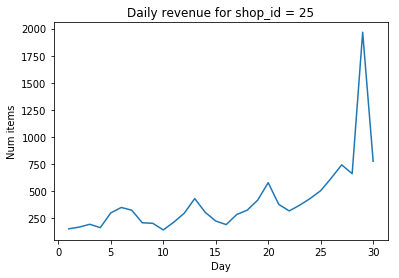

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [236]:
shop_id = 25

total_num_items_sold = total_num_items_sold_temp[['item_cnt_day']]
days = range(1,31)

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = item_var
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [237]:
STUDENT_EMAIL = 'chaki.sourabh@gmail.com'
STUDENT_TOKEN = 'tfuaHgqjR30bsdDY'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [238]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)